## Warping tutorial
#### a_example_spectro
##### April 2020
###### Eva Chamorro - Daniel Zitterbart - Julien Bonnel

## THIS CODE IS TO LOCALIZE FM SOURCES

## 1. Import packages

In [1]:
import os as os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import ipywidgets as widgets
from time_frequency_analysis_functions import *
from ipywidgets import interact, interact_manual
import warnings
warnings.filterwarnings('ignore')

## 2. Load simulated signal

In [2]:
data = sio.loadmat(os.getcwd()+ '/sig_pek_for_warp.mat')


'''
  s_t: propagated modes in a Pekeris waveguide with parameters
       c1, c2, rho1, rho2: sound speed / density
       D: depth
       r: range
       zs, zr: source/receiver depth
  s_t_dec: same than s_t, except that time origin has been set for warping
  fs: sampling frequency
 
  NB: one can run optional_create_simulated_signal.m to generate another
  simulated signal
  IF YOU CHANGE RANGE, you must change the following variable which
  defines the bounds on the x-axis for all the plots
     
         '''

# Select variables 

s_t=data['s_t']
fs=data['fs']


xlim_plots=[6.5,7.5]
print('Continue')

Continue


## 3. Compute time-frequency representation

In [3]:
# Signal length
N = np.size(s_t)

# Short Time Fourier Transform parameters
vec_t = np.arange(1, N + 1)

vec_t = vec_t[np.newaxis, :]  # time samples where the STFT will be computed (i.e. positions of the sliding window)

NFFT = 2048  # FFT size
N_window = 31  # sliding window size (need an odd number)

# STFT computation
h = np.hamming(N_window)
h = h[:, np.newaxis]
tfr = tfrstft(s_t, vec_t, NFFT, h)


# Spectrogram ~ modulus STFT
spectro=abs(tfr)**2

# Time and frequency axis
time=np.arange(0,N)/fs
freq=np.arange(0,NFFT)*fs/NFFT

print('Continue')

Continue


## 4. Plots

The code has loaded a signal propagated in a Pekeris waveguide and shows the time series



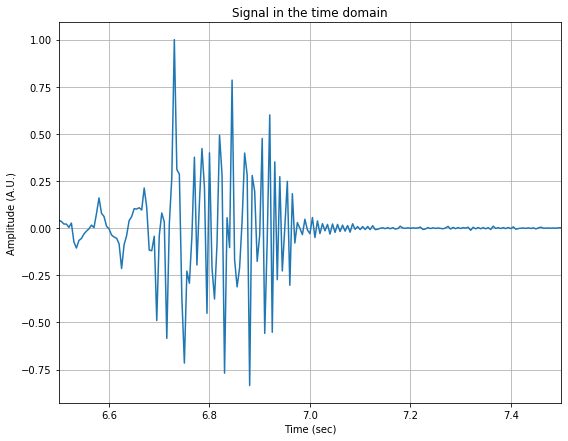

Continue and see the spectrogram


In [4]:
# Figure

print('The code has loaded a signal propagated in a Pekeris waveguide and shows the time series')
print('')

plt.figure(figsize=(9.0,7.0))
plt.plot(time[0,:], s_t[0,:])
plt.xlim(xlim_plots)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (A.U.)')
plt.title('Signal in the time domain')
plt.grid()
plt.show()


print('Continue and see the spectrogram')


This is the spectrogram, computed with a sliding window 
of length Nw=31 samples (or 0.15 s , since the sampling frequency is 200 Hz
As a reminder, the spectrogram is computed by dividing the original signal into
segments of length Nw. Another important parameter for spectrogram computation is
overlap. In this tutorial, the overlap between segment is Nw-1 samples, which is 
the maximum overlap that one can obtain : the percentage of overlap is 100*(Nw-1)/Nw
Such a high overlap will be handy for modal filtering



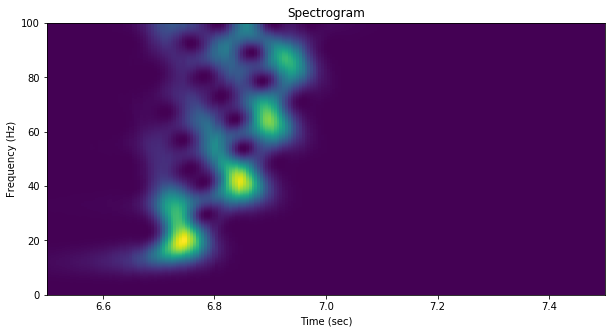

Continue and modify the window size


In [5]:
# Figure

print('This is the spectrogram, computed with a sliding window ')
print('of length Nw=31 samples (or 0.15 s , since the sampling frequency is 200 Hz')
print('As a reminder, the spectrogram is computed by dividing the original signal into')
print('segments of length Nw. Another important parameter for spectrogram computation is')
print('overlap. In this tutorial, the overlap between segment is Nw-1 samples, which is ')
print('the maximum overlap that one can obtain : the percentage of overlap is 100*(Nw-1)/Nw')
print('Such a high overlap will be handy for modal filtering')
print('')


plt.figure(figsize=[10,5])
plt.imshow(spectro, extent=[time[0][0], time[0][-1], freq[0][0], freq[0][-1]], aspect='auto',origin='low')
plt.xlim(xlim_plots)
plt.ylim([0, fs / 2])
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.show()


print('Continue and modify the window size')

In [6]:
# INTERACTIVE METHOD

print('Now you can modify the window length')
print('Remember to give it in number of samples')
print('Number between 11 and 71 are reasonable tries')
print('(for coding reason, we use odd numbers only)')
print('')
print('Select the N_window and click "Run Interact" to see the spectogram')


@interact_manual
def showSpectogram2(N_window=(11,71,2)):
    d = np.hamming(N_window)
    d = d[:, np.newaxis]
    tfr = tfrstft(s_t, vec_t, NFFT, d)
    
    # Spectrogram ~ modulus STFT
    spectro = abs(tfr) ** 2
        
    plt.figure(figsize=[10,5])
    plt.imshow(spectro, extent=[time[0,0], time[0,-1], freq[0,0], freq[0,-1]], origin='low')
    plt.ylim([0, fs / 2])
    plt.xlim(xlim_plots)
    plt.gca().set_aspect('auto')
    plt.xlabel('Time (sec)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Spectrogram N_window: '+ str(N_window))
    plt.show()
    
    
print('  ')
print('END')
    

Now you can modify the window length
Remember to give it in number of samples
Number between 11 and 71 are reasonable tries
(for coding reason, we use odd numbers only)

Select the N_window and click "Run Interact" to see the spectogram


interactive(children=(IntSlider(value=41, description='N_window', max=71, min=11, step=2), Button(description=…

  
END
